In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob 
import time 
import envi
import h5py
import cv2
import spectral.io.envi as envi

In [2]:
#path_hyperskin = '/mnt/datassd/icasp/data/preprocessed/downsampled/' #npy 
path_hyperskin = '/mnt/datassd/icasp/data/raw/Link_2/' #mat 
#path_hyperbrain = '/mnt/datassd/icasp/data/Brain_HSI/preprocessed_4/' #npy 
path_hyperbrain = '/mnt/datassd/icasp/data/Brain_HSI/raw/' #hdr
path_ntire = '/mnt/datassd/icasp/data/NTIRE/Train_Spec/' #mat 

In [3]:
paths = {'skin': path_hyperskin,
         'brain':path_hyperbrain,
         'ntire':path_ntire}

In [4]:
def read_hyp_imgs(d_file, extra='mat'): 
    fend = d_file.split('.')[-1]

    if fend =='mat': 
        
        filepath = d_file
        arrays = []
        f = h5py.File(filepath)

        for k, v in f.items():
            arrays.append(np.array(v))

        try: 
            img = np.array(arrays).reshape(v.shape[0], 1024, 1024)
            img = np.swapaxes(img,1,2) #colocando o rosto de pé em vez de deitado
        except: 
            filepath = d_file
            f = h5py.File(filepath, 'r')
            data = f.get('cube')
            img = np.array(data)
            img = np.swapaxes(img, 1,2) #colocando o tudo de pé em vez de deitado
        
    if fend=='jpg':
        try:  
            img = cv2.imread(d_file)
            img = np.swapaxes(img, 0,2) #colocando os canais na primeira dimensão 
            img = np.swapaxes(img, 1,2) #colocando o rosto de pé em vez de deitado
           
        except: 
            print('Error: ', d_file)
            
    if fend =='npy': 
        img = np.load(d_file)
    
    if extra =='hdr': 
        img = read_hyp(f,'raw')
    

    return img

In [20]:
def read_hyp(f, ext):
  header_file = f + '/' + ext + '.hdr'
  spectral_file = f + '/' + ext

  numpy_ndarr = envi.open(header_file, spectral_file)
  img = numpy_ndarr.read_bands(np.arange(0,numpy_ndarr.nbands,1))
  img = np.moveaxis(img, 2,0)

  return img

In [6]:
path_vis = 'Hyper-Skin(RGB, VIS)/train/VIS/'
path_nir = 'Hyper-Skin(MSI, NIR)/train/NIR/'

In [7]:
imgs = {'skin': ['p003_neutral_front', 'p005_smile_front', 'p028_neutral_front'],
         'brain':['039-02', '019-01', '022-02'],
         'ntire':['ARAD_1K_0062', 'ARAD_1K_0535', 'ARAD_1K_0127']}

In [8]:
ext = {'skin': '*.mat',
        'brain':'hdr',
        'ntire':'mat'}

In [40]:
def plot_avg_spectra(npy_img, dataset, i, save=True):

    colors = {'skin': ['purple', 'orchid'], 
              'brain': ['darkcyan', 'cyan'],
              'ntire':  ['darkorange', 'sandybrown']
              }
    
    x_dict = {'skin': [400, 1000], 
              'brain': [400, 1700],
              'ntire': [400, 700]
              }
    #x = np.arange(0,npy_img.shape[0]) 
    x = np.linspace(x_dict[dataset][0],x_dict[dataset][1],npy_img.shape[0]) 
    x = np.ceil(x)
    
    avg_spectra = np.mean(npy_img,axis=(1,2))
   
    std_spectra = np.std(npy_img, axis=(1,2))
    plt.tight_layout()
    plt.plot(x, avg_spectra,'c-', label ='média', color=colors[dataset][0])
    plt.fill_between(x, avg_spectra -std_spectra/2,  avg_spectra + std_spectra/2,  alpha=0.5, edgecolor=colors[dataset][0], facecolor=colors[dataset][1])
    plt.title(i, fontsize=12)
    plt.legend()
    plt.xlabel('Comprimento de onda (nm)', fontsize=16)
    plt.ylabel('Intensidade normalizada',  fontsize=16)

    if save: 
        plt.savefig('/mnt/datassd/mst_toolbox/MST-plus-plus-2/datasets_compare/' + dataset + '_' + i + '.png', dpi=1000)
    plt.show()

(62, 1024, 1024)


/tmp/ipykernel_1355104/3806162364.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "c-" (-> color='c'). The keyword argument will take precedence.
  plt.plot(x, avg_spectra,'c-', label ='média', color=colors[dataset][0])


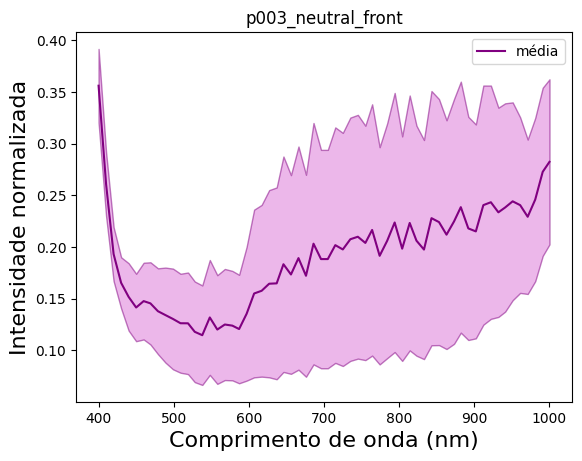

(62, 1024, 1024)


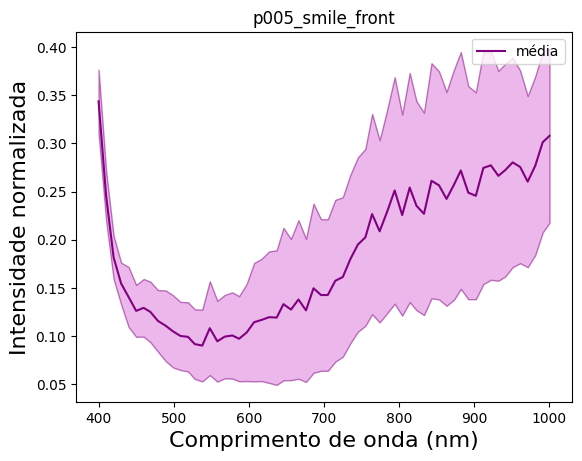

(62, 1024, 1024)


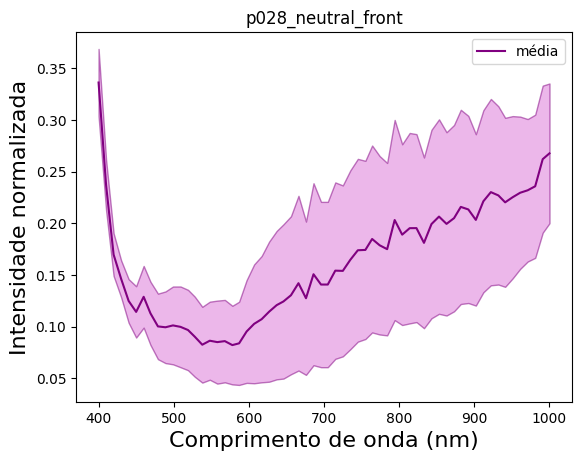

(826, 399, 439)


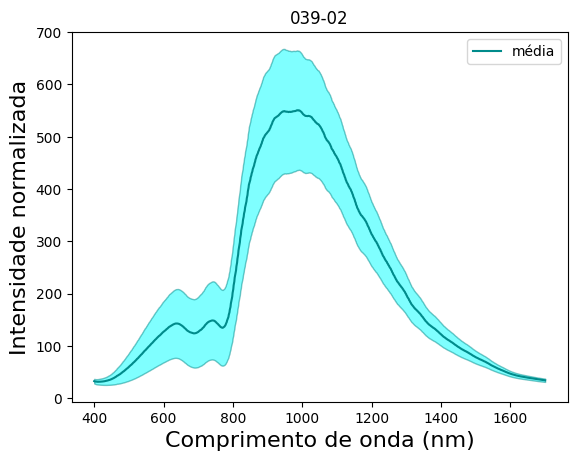

(826, 601, 535)


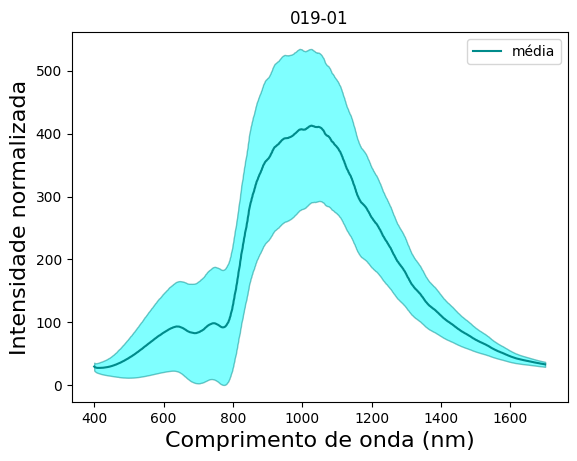

(826, 611, 527)


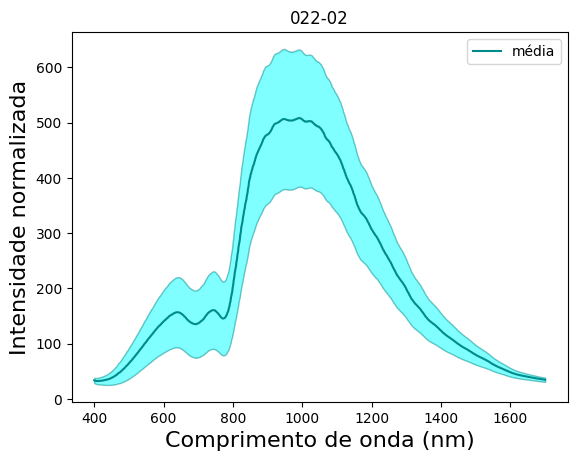

(31, 482, 512)


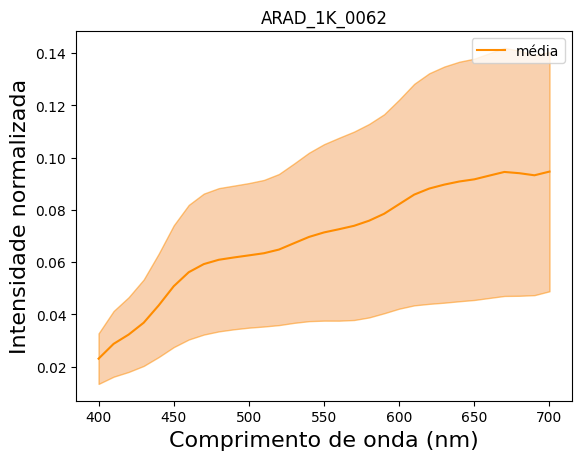

(31, 482, 512)


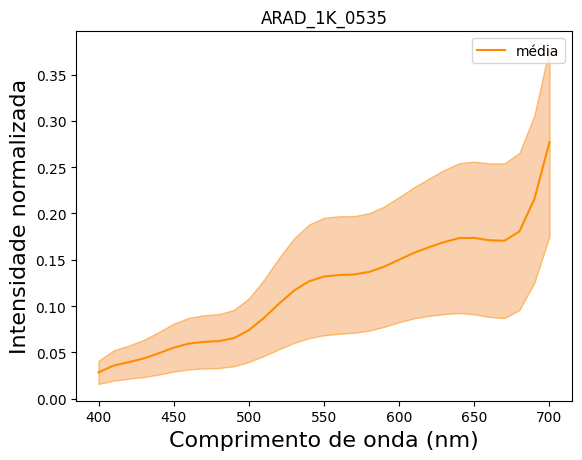

(31, 482, 512)


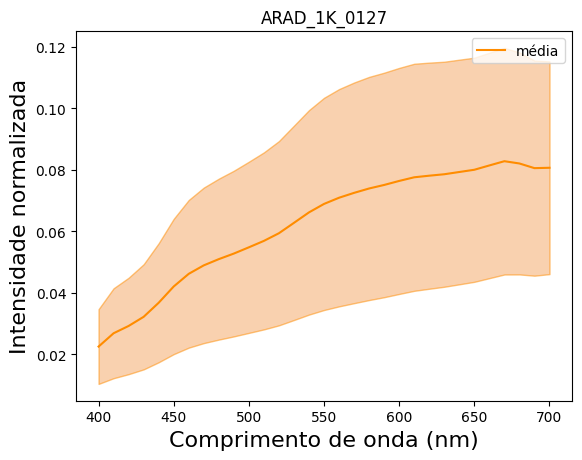

In [41]:
for dataset in imgs.keys():
    for i in imgs[dataset]: 

        if dataset == 'skin': 
            vis = read_hyp_imgs(glob.glob(paths[dataset] + path_vis + i +'*')[0])
            nir = read_hyp_imgs(glob.glob(paths[dataset]  + path_nir + i +'*')[0])

            npy_img = np.concatenate((vis,nir), axis = 0)
            print(npy_img.shape)
            plot_avg_spectra(npy_img, dataset, i)
        
        elif dataset == 'brain': 
            npy_img = read_hyp(paths[dataset] + i, 'raw')
            print(npy_img.shape)
            plot_avg_spectra(npy_img, dataset, i)
        
           
        else: 
           
           npy_img = read_hyp_imgs(glob.glob(paths[dataset] + i +'*')[0], ext[dataset])
           print(npy_img.shape)
           plot_avg_spectra(npy_img, dataset, i)

In [ ]:
sorted(glob.glob(path_hyperskin + path_vis + '*.mat'))[0]